In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
try:
    connection = sqlite3.connect("../data/checking-logs.sqlite")

    query = """
    SELECT
        uid,
        strftime('%w', timestamp) AS weekday,
        strftime('%H', timestamp) AS hour
    FROM checker
    WHERE uid LIKE 'user_%'
    """
    df = pd.read_sql_query(query, connection)
    connection.close()
except FileNotFoundError as e:
    print("Database does not exist")
    raise e

In [3]:
# Преобразуем в числа
df['weekday'] = df['weekday'].astype(int)
df['hour'] = df['hour'].astype(int)

# Перевод: чтобы понедельник был первым (0 = Mon, 6 = Sun)
weekday_map = {0: 6, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}
df['weekday'] = df['weekday'].map(weekday_map)

# Сортируем юзеров по числу коммитов
user_order = df['uid'].value_counts().index.tolist()

# Тепловая карта по дням недели
heatmap_weekday = df.groupby(['weekday', 'uid']).size().unstack(fill_value=0)
heatmap_weekday = heatmap_weekday.reindex(columns=user_order).sort_index()

# Тепловая карта по часам
heatmap_hour = df.groupby(['hour', 'uid']).size().unstack(fill_value=0)
heatmap_hour = heatmap_hour.reindex(columns=user_order)

# Убеждаемся, что у нас есть все часы от 0 до 23
all_hours = list(range(24))
heatmap_hour = heatmap_hour.reindex(index=all_hours, fill_value=0)

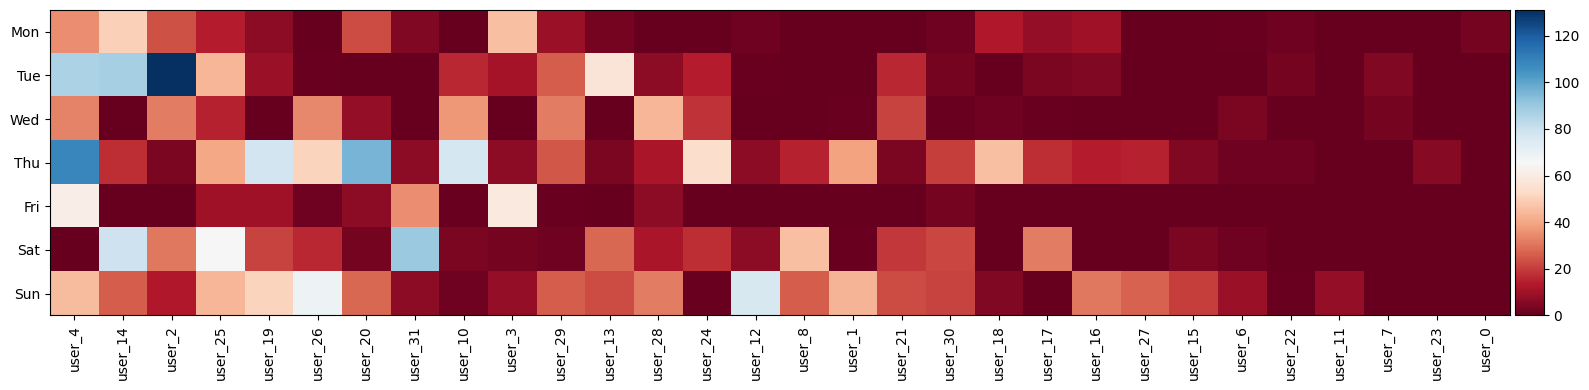

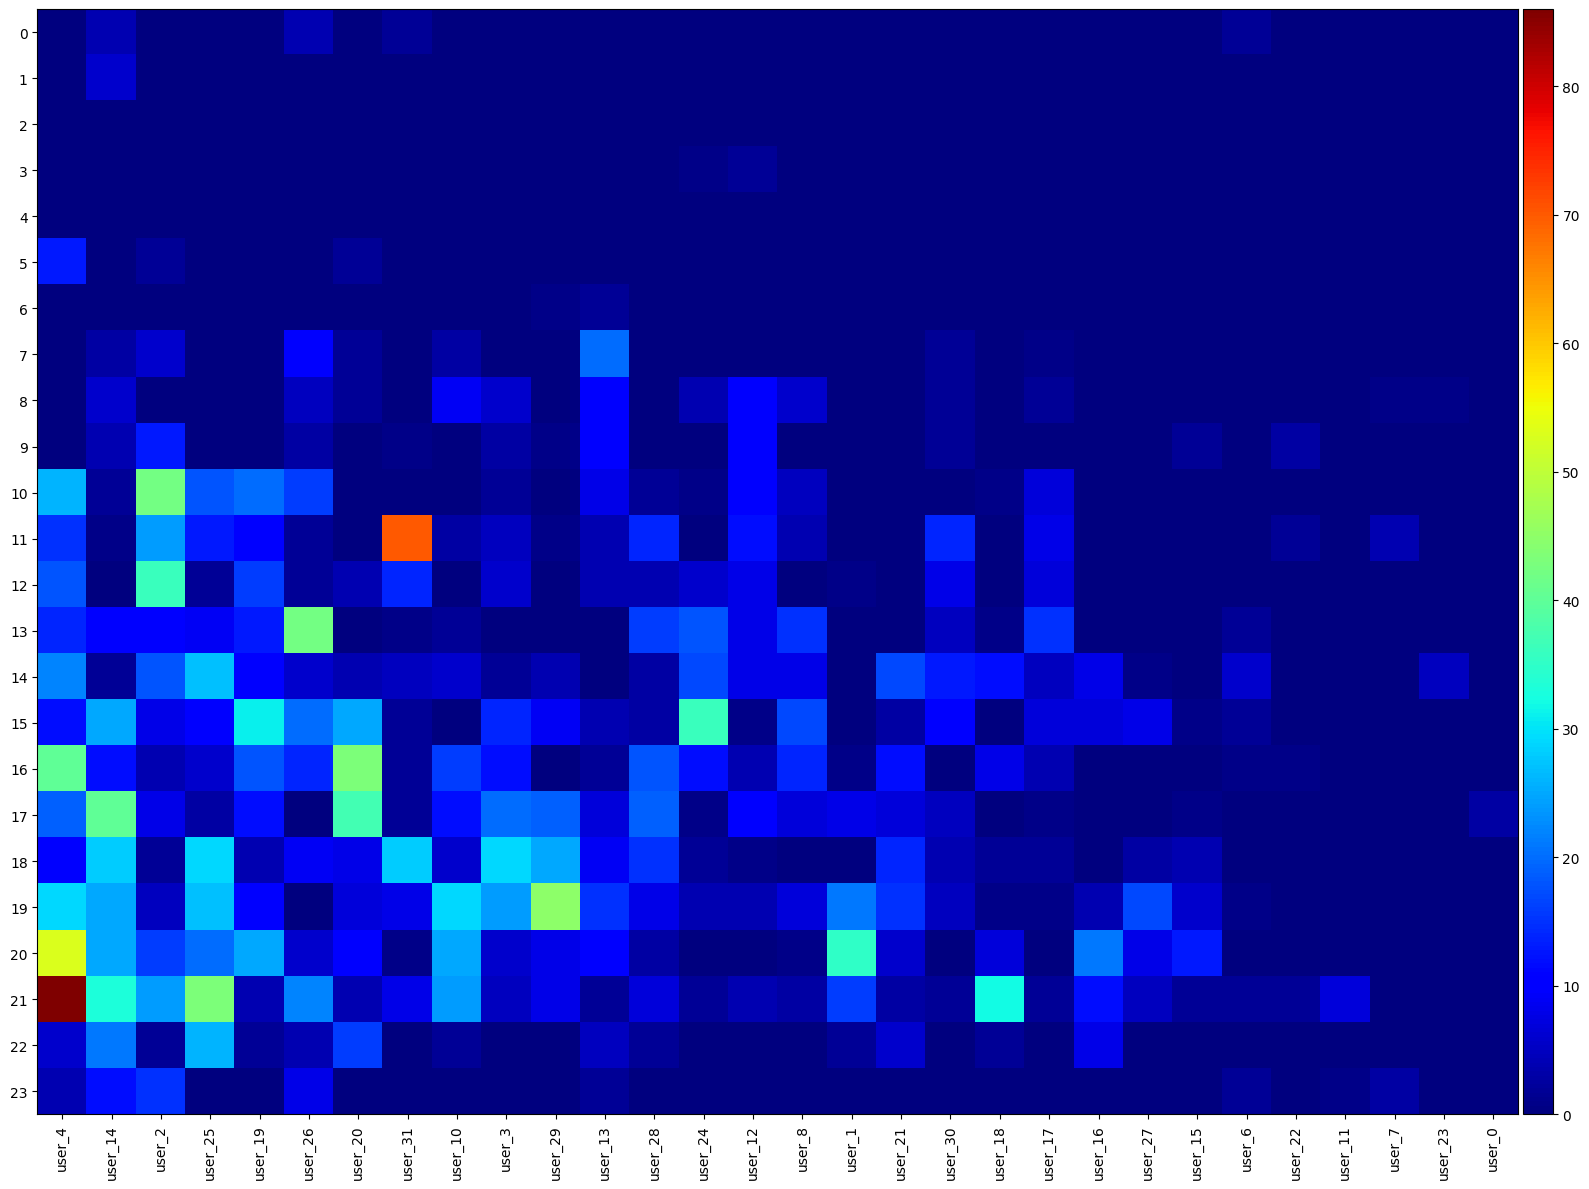

In [4]:
# Верхний график
fig1, ax1 = plt.subplots(1, 1, figsize=(16, 4))

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="2%", pad=0.05)

im1 = ax1.imshow(heatmap_weekday.values, aspect='auto', cmap='RdBu')
ax1.set_yticks(range(7))
ax1.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_xticks(range(len(user_order)))
ax1.set_xticklabels(user_order, rotation=90, fontsize=10)
fig1.colorbar(im1, cax=cax1)

plt.tight_layout()
plt.show()

# Нижний график
fig2, ax2 = plt.subplots(1, 1, figsize=(16, 12))

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="2%", pad=0.05)

im2 = ax2.imshow(heatmap_hour.values, aspect='auto', cmap='jet')
ax2.set_yticks(range(24))
ax2.set_yticklabels(range(24))
ax2.set_xticks(range(len(user_order)))
ax2.set_xticklabels(user_order, rotation=90, fontsize=10)
fig2.colorbar(im2, cax=cax2)

plt.tight_layout()
plt.show()

In [5]:
try:
    connection.close()
    print("Database closed")
except Exception as e:
    print("Database does not exist")
    raise e

Database closed


**Вопрос:** У какого пользователя больше всего коммитов во вторник?</br> **Ответ**: user_2.

**Вопрос:** У какого пользователя больше всего коммитов в четверг?</br> **Ответ**: user_4.

**Вопрос:** В какой день недели пользователи не любят делать много коммитов? </br> **Ответ:** Понедельник

**Вопрос:** У какого пользователя в какое время было наибольшее количество коммитов?</br> **Ответ:**  user_2, 10